In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv("DiabetesData.csv")

In [3]:
#Check new data
print(df.columns)
df.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


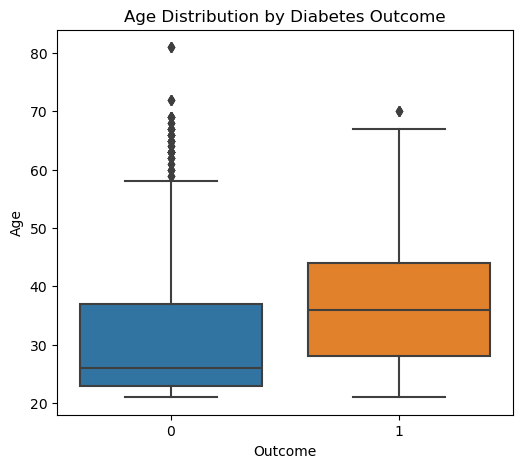

In [4]:
#Plot the relationship
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['Outcome'], y=df.Age)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

In [5]:
#Convert spring or alphabet column to numberical or numbers
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
  
    return data

df = encode_labels(df)

In [6]:
#Check and remove missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Remove null values
df.dropna(inplace = True)

In [8]:
#Determine the number of clusters 
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia_t.append(km.inertia_)

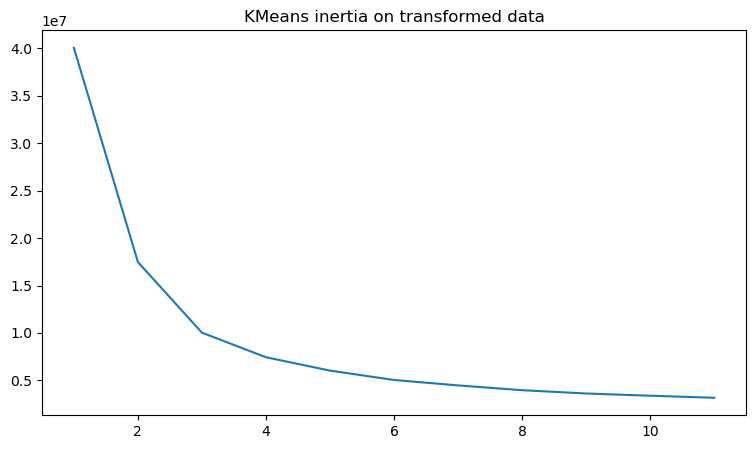

In [9]:
#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')
plt.show()

In [10]:
#Build the model
n=5
kmeans5=KMeans(n_clusters=n,n_init=10,max_iter=500)
kmeans5.fit(df)

KMeans(max_iter=500, n_clusters=5, n_init=10)

In [11]:
#Add the clusters into the initial dataframee (centers)
df['clusters']=kmeans5.labels_
kmeans5.cluster_centers_

array([[2.62691131e+00, 1.03188073e+02, 6.92125382e+01, 2.66957187e+01,
        7.91299694e+01, 3.11022936e+01, 4.76203364e-01, 2.79097859e+01,
        1.25382263e-01],
       [4.09375000e+00, 1.51268750e+02, 7.40125000e+01, 3.10875000e+01,
        2.97125000e+02, 3.63993750e+01, 5.78712500e-01, 3.40375000e+01,
        5.06250000e-01],
       [4.29437546e+00, 1.19078159e+02, 6.74492330e+01, 1.21731191e+01,
        6.26734843e-01, 3.09821768e+01, 4.18945215e-01, 3.55471147e+01,
        3.60116874e-01],
       [2.97014925e+00, 1.61059701e+02, 7.34328358e+01, 3.48955224e+01,
        5.22388060e+02, 3.68940299e+01, 6.44820896e-01, 3.11343284e+01,
        6.11940299e-01],
       [3.68532819e+00, 1.34584942e+02, 7.14266409e+01, 3.12857143e+01,
        1.67268340e+02, 3.45656371e+01, 5.47279923e-01, 3.33223938e+01,
        4.92277992e-01]])

In [12]:
#Check the data Frame with the new column
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,clusters
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,4


In [13]:
#calculate the score / evaluate the model performance 
#The value of the silhouette coefﬁcient is between [-1, 1].
#The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. 
#The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

print(silhouette_score(df.iloc[:,0:9],kmeans5.labels_))

0.3978426405839935


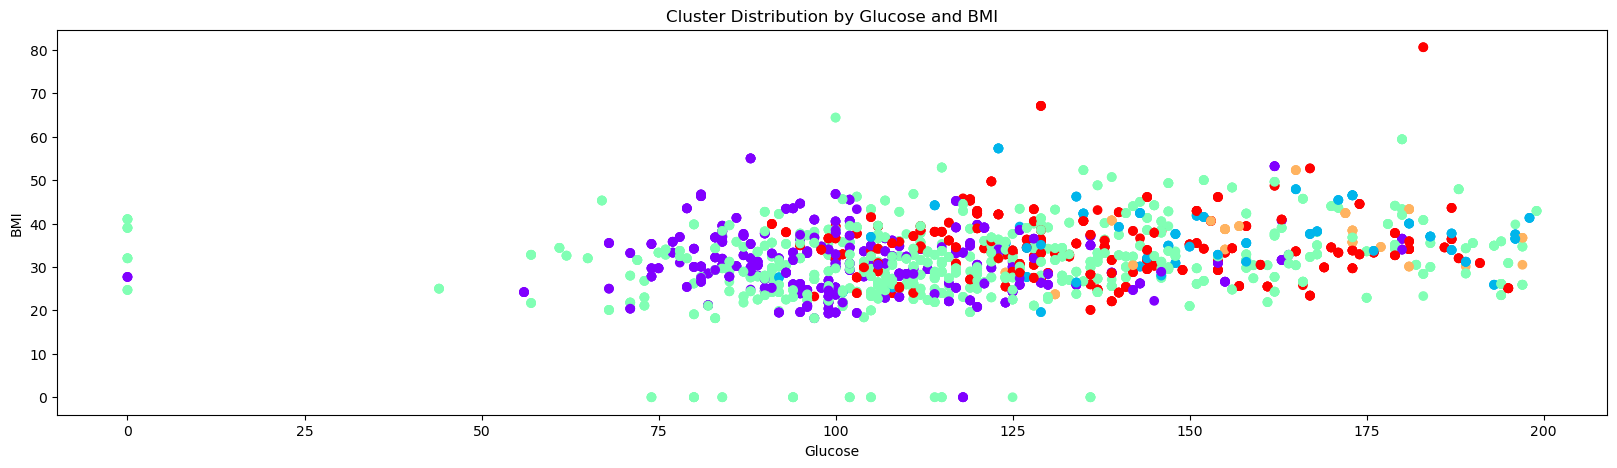

In [14]:
import matplotlib.pyplot as plt

# Assuming kmeans5 is already defined and fitted on the dataset with appropriate attributes
plt.figure(figsize=(20, 5))
plt.scatter(df["Glucose"], df["BMI"], c=kmeans5.labels_, cmap="rainbow")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Cluster Distribution by Glucose and BMI")
plt.show()


In [15]:
#Save the new dataframe to Excel
df.to_csv("DiabetesData.csv")